# 머신러닝을 이용한 타이타닉 생존자 예측

1.1 데이터 로드  
titanic 데이터를 로드하여 데이터의 일부분을 확인합니다.  
이때 head 함수를 사용하여 상위 5개의 레코드 값을 확인합니다.

In [ ]:
import pandas as pd

titanic = pd.read_excel('https://github.com/hmkim312/datas/blob/main/titanic/titanic.xls?raw=true')
titanic.?

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


타이타닉은 1910년 당시 최대의 여객선으로 영국에거 미국 뉴욕으로 가던 여객선으로 다음의 정보를 포함합니다.
* Pclass : 객실 등급
* Survived : 생존 유무
* Sex : 성별
* Name : 이름
* Age : 나이
* Sibsp : 형제 혹은 부부의 수
* Parch : 부모 혹은 자녀의 수
* Fare : 지불한 요금
* Boat : 탈출시 사용한 보트 번호

1.2 데이터 확인 (생존상황)  
데이터의 특성을 분석하기 위해 첫번째로, 생존 상황을 분석합니다.  
생존 상황은 살아남은 사람들의 숫자와 비율을 먼저 확인합니다!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


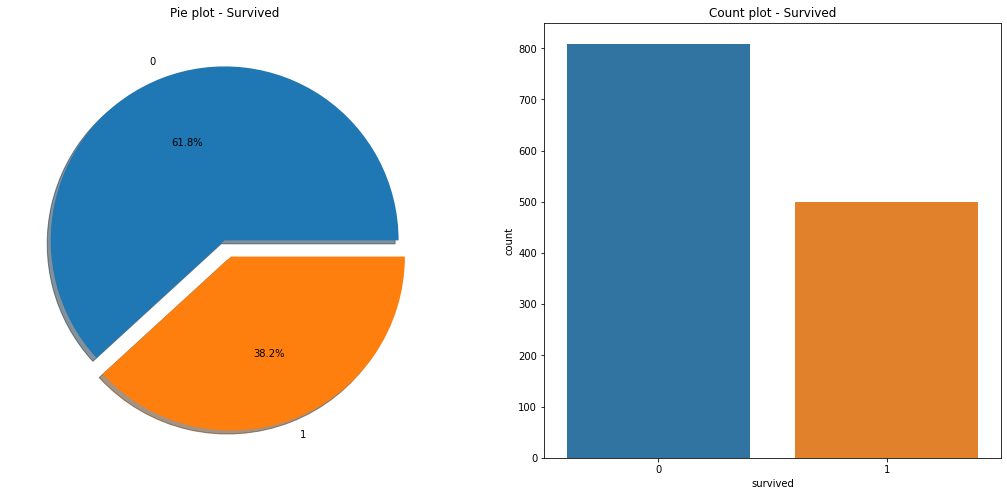

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(18, 8))

titanic['survived'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)

ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

1.3 성별에 따른 생존 상황   
데이터의 특성을 분석하기 위해 두번째로, 성별에 따른 생존 상황을 분석합니다.  
성별에 따른 생존 상황은 성별에 따른 생존자와 사망자의 숫자를 성별에 따라 확인합니다.  
countplot의 hue 옵션으로 bar 구분이 가능합니다.
예제에서는 survivied에 따른 결과를 확인 할 수 있도록 합니다 !

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


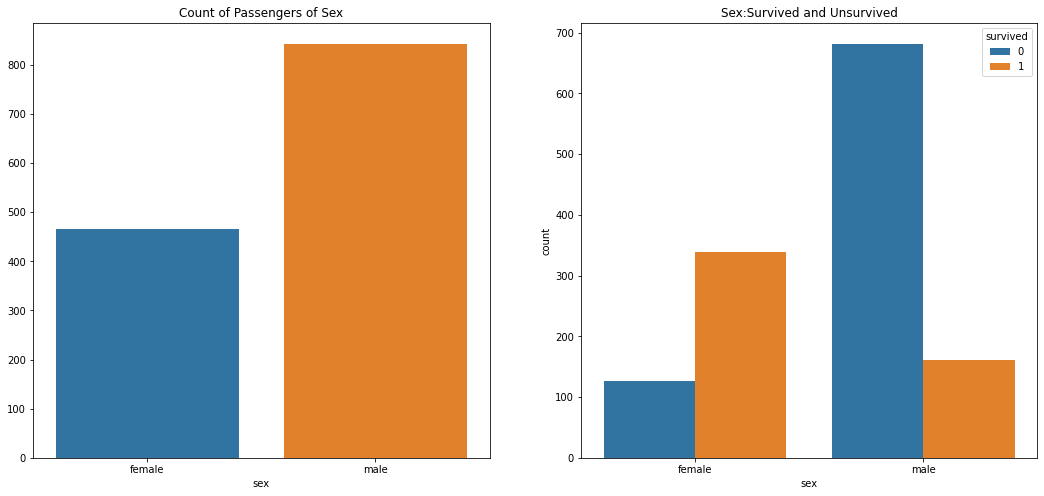

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

sns.countplot('sex', data = titanic, ax=ax[0])
ax[0].set_title('Count of Passengers of Sex')
ax[0].set_ylabel('')

sns.countplot('sex', hue = ?, data = titanic, ax=ax[1])
ax[1].set_title('Sex:Survived and Unsurvived')
plt.show()

1.4 나이를 5단계로 범주화  
생존/사망자의 나이를 구간을 나눠 범주화를 진행합니다.   
0-7은 baby, 7-15는 teen, 15-30은 young, 30-60은 adult, 60-100은 old로 합니다.  
이때, "pandas.cut (X, bins, labels)" 함수를 사용합니다.  
bins [start, end]는 start 초과, end 미만의 값을 사용합니다.  
여기서는 titanic의 age 컬럼에 해당되는 열을 사용하여, 범주화를 진행합니다 !


In [ ]:
titanic['age_cat'] = pd.cut(?, bins=?,
                            include_lowest=True, labels=?)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


1.5 경재력 대비 생존률  
pandas의 crosstab은 범주형 변수로 되어있는 요인별로 교차분석을 진행하여 도수분포표, 교차표를 만드는 함수 입니다.  
pd.crosstab(index, columns) 함수는 행과 열의 데이터에 따른 교차표를 보여주며, margins=True 합계를 나타내는 옵션입니다.


In [ ]:
# 타이타닉의 pclass 컬럼과 survived 컬럼을 사용하며, margins=True 옵션을 적용합니다.
pd.?(?, ?, margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


* 1등실의 생존 가능성이 아주 높음
* 여성의 생존률도 높음
* 1등실에는 여성이 많이 타고있었는가?

1.6 나이, 성별, 등급별 생존자 숫자를 한번에 파악

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


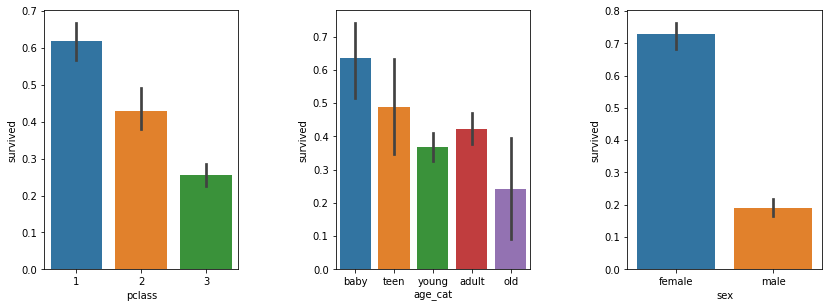

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.barplot('pclass', 'survived', data=titanic)
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=titanic)
plt.subplot(133)
sns.barplot('sex', 'survived', data=titanic)
plt.subplots_adjust(top=1, bottom=0.1, left=0.1,
                    right=1, hspace=0.5, wspace=0.5)
plt.show()

2. 머신러닝을 이용한 생존자 예측

2.1 구조확인

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
dtypes: category(1), float64(3), int64(4), object(7)
memory usage: 144.8+ KB


* null값의 처리와, 라벨인코딩도 필요

2.2 성별 컴럼을 숫자로 변경하기
pandas의 uniqueue 함수는 DataFrame의 단일 연을 처리하고, 열의 모든 고유 요소를 반환할 때 사용합니다.  
unique함수를 사용하여 성별 ('sex')에 해당되는 속성의 고유 요소를 확인하세요.

In [ ]:
titanic['sex'].?()


array(['female', 'male'], dtype=object)

2.3 Label Encode 사용  
LabelEncoder는 문자를 0부터 시작하는 정수형 숫자로 바꿔주는 기능을 제공   
반대로 (라벨) 코드 숫자를 이용하여 원본을 구하는 것도 가능  
LabelEncoder 객체를 생성한 후, 수치화시키고자 하는 filed를 해당 객체 (fit)를 통해서 변형 (transform)  
fit 함수를 사용하여 수치화하려는 대상을 지정, transform을 사용하여 수치화하려는 대상을 변형

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.?(titanic['sex'])
titanic['gender'] = le.?
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,0


* gender라는 컬럼을 생성하여 성별을 변경

2.4 결측치 제외   
결측치가 아닌 항목을 확인하려면 notnull() 함수를 사용합니다.

In [ ]:
titanic = titanic[titanic['age'].?]
titanic = titanic[titanic['fare'].?]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   object  
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  gender     1045 non-null   int64   
dtypes: category(1), float64(3), int64(5), object(7)
memory usage: 131.8+ KB


2.5 상관관계

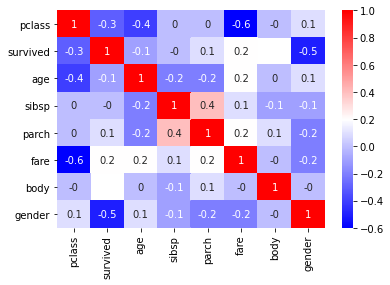

In [ ]:
correlation_matrix = titanic.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')
plt.show()

실수형 데이터들의 상관관계를 보았을때, 생존(Survived)는 성별과 pclass의 상관관계가 높음을 확인

2.6 특정 선택 후 데이터 나누기  
데이터 셋을 학습과 검증용으로 나누기 위해서는 train_test_split 함수를 사용합니다.  
이때, test_size옵션을 사용하여 비율을 결정합니다.  
여기에서는 테스트 셋의 크기가 20%가 되도록 합니다.

In [ ]:
from sklearn.model_selection import train_test_split

X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare','gender']]
y = titanic['survived']

X_train, X_test, y_train, y_test = ?(X, y, ?, random_state = 13)

2.7 RandomForest  
RandomForestClassifier 함수는 랜덤포레스트를 할때 사용하는 함수 입니다.  
n_estimators (생성할 의사결정 나무 개수), max_features (의사결정나무 만들 시, 사용하는 feature 개수)  
어떠한 ML을 사용할지 명시를 하고, 어떤 데이터를 사용하여 학습을 하고 (fit), 어떤 데이터를 사용하여 검증을 하는지 명시합니다 (predict)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state= 13, n_estimators= 100, max_depth=4)
rf.?(X_train, y_train)

pred = rf.?(X_test)
print(accuracy_score(y_test, pred))

0.7799043062200957


2.8 Pipeline을 만들고, Standard 스케일러를 사용
파이프라인은 여러 단계에 걸쳐 진행되는 작업을 한번에 진행 할수 있도록 하는 방법  
파이프라인을 통해 한번에 진행하려는 작업을 기술하고 (estimator), Pipeline의 파라미터로 사용 !

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
             ('clf', RandomForestClassifier(random_state=13))]

pipe = Pipeline(?)

2.9.1 최적의 파라미터를 위한 그리드 서치  
그리드 서치는 GridSearchCV 함수를 사용하여 진행합니다.  
estimator 옵션에는 pipe를 사용하여 이전에 만든 파이프라인을 사용합니다.  
이외에 fold의 값이 5가 되도록 합니다.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = [{
    'clf__max_depth': [6, 8, 10, 100],
    'clf__n_estimators': [50, 100, 200, 1000]
}]

gridsearch = GridSearchCV(
    ?, ?, return_train_score=True, ?, verbose=2)

gridsearch.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] clf__max_depth=6, clf__n_estimators=50 ..........................
[CV] ........... clf__max_depth=6, clf__n_estimators=50, total=   0.1s
[CV] clf__max_depth=6, clf__n_estimators=50 ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ........... clf__max_depth=6, clf__n_estimators=50, total=   0.1s
[CV] clf__max_depth=6, clf__n_estimators=50 ..........................
[CV] ........... clf__max_depth=6, clf__n_estimators=50, total=   0.1s
[CV] clf__max_depth=6, clf__n_estimators=50 ..........................
[CV] ........... clf__max_depth=6, clf__n_estimators=50, total=   0.1s
[CV] clf__max_depth=6, clf__n_estimators=50 ..........................
[CV] ........... clf__max_depth=6, clf__n_estimators=50, total=   0.1s
[CV] clf__max_depth=6, clf__n_estimators=100 .........................
[CV] .......... clf__max_depth=6, clf__n_estimators=100, total=   0.2s
[CV] clf__max_depth=6, clf__n_estimators=100 .........................
[CV] .......... clf__max_depth=6, clf__n_estimators=100, total=   0.2s
[CV] clf__max_depth=6, clf__n_estimators=100 .........................
[CV] .......... clf__max_depth=6, clf__n_estimators=100, total=   0.2s
[CV] clf__max_depth=6, clf__n_estimators=100 .........................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   56.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                              

pipeline을 사용하여 gridsearchcv를 사용해보았음
max_depth는 6,8,10,100, n_estimators는 50, 100, 200, 1000개를 사용함
pipeline의 gridsearch는 __를 붙여야 함


2.9.2 각 모델간 성능 비교

In [ ]:
score_df = pd.DataFrame(gridsearch.cv_results_)
score_df[['params', 'rank_test_score', 'mean_train_score',
          'mean_test_score', 'std_train_score']]

,params,rank_test_score,mean_train_score,mean_test_score,std_train_score
0,"{'clf__max_depth': 6, 'clf__n_estimators': 50}",4,0.861962,0.691866,0.013440
1,"{'clf__max_depth': 6, 'clf__n_estimators': 100}",2,0.860526,0.694737,0.014366
2,"{'clf__max_depth': 6, 'clf__n_estimators': 200}",3,0.859091,0.692823,0.013937
3,"{'clf__max_depth': 6, 'clf__n_estimators': 1000}",1,0.859809,0.704306,0.013605
4,"{'clf__max_depth': 8, 'clf__n_estimators': 50}",8,0.898325,0.684211,0.011597
5,"{'clf__max_depth': 8, 'clf__n_estimators': 100}",5,0.900239,0.688038,0.012491
6,"{'clf__max_depth': 8, 'clf__n_estimators': 200}",6,0.898804,0.686124,0.013247
7,"{'clf__max_depth': 8, 'clf__n_estimators': 1000}",6,0.899043,0.686124,0.012985
8,"{'clf__max_depth': 10, 'clf__n_estimators': 50}",12,0.933971,0.664115,0.013730
9,"{'clf__max_depth': 10, 'clf__n_estimators': 100}",11,0.933971,0.666029,0.013264
